In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score,\
precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [3]:
def scaling (df):
    ss =MinMaxScaler()
    for col in df.columns:
        if df[col].dtype != 'object':
            df[col] = ss.fit_transform(df[[col]])

    return df

In [4]:
def check_path (path):
    df = pd.read_csv(path)

    if df.isnull().sum().sum() ==0:
        print('No problem')

    a = df.describe()
    if np.max(a[a.index =='mean'].values)- np.min(a[a.index =='mean'].values)>10:
        print('Scaling problem')
        
        df = scaling(df)
    if df.shape[1]>df.shape[0]:
        print('High dimensional data ')
    return df

In [5]:
df = check_path('Data/pulsar_data_train.csv')
df.head(2)


Scaling problem


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.627134,0.352060,0.215498,0.025449,0.013301,0.106795,0.281035,0.056276,0.0
1,0.386883,0.170109,0.249901,0.074121,0.009840,0.098774,0.333180,0.087764,0.0


In [6]:
# We check balance problem
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

### We can see balance problem and solve it.Use undersampling method.

In [6]:
df_1 = df[df['target_class']==1]

In [7]:
df_0 = df[df['target_class']==0]

In [8]:
print(df_1.shape,df_0.shape)

(1153, 9) (11375, 9)


In [9]:
df_0 = df_0.sample(n=1153,random_state=42)
df_0.shape

(1153, 9)

In [10]:
df = pd.concat([df_0,df_1], axis=0)
df.shape

(2306, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 273 to 12521
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                2306 non-null   float64
 1    Standard deviation of the integrated profile  2306 non-null   float64
 2    Excess kurtosis of the integrated profile     2000 non-null   float64
 3    Skewness of the integrated profile            2306 non-null   float64
 4    Mean of the DM-SNR curve                      2306 non-null   float64
 5    Standard deviation of the DM-SNR curve        2094 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           2306 non-null   float64
 7    Skewness of the DM-SNR curve                  2185 non-null   float64
 8   target_class                                   2306 non-null   float64
dtypes: float64(9)
memory usage: 180.2 KB


In [12]:
df.isnull().sum()

 Mean of the integrated profile                    0
 Standard deviation of the integrated profile      0
 Excess kurtosis of the integrated profile       306
 Skewness of the integrated profile                0
 Mean of the DM-SNR curve                          0
 Standard deviation of the DM-SNR curve          212
 Excess kurtosis of the DM-SNR curve               0
 Skewness of the DM-SNR curve                    121
target_class                                       0
dtype: int64

In [13]:
q1 = df[' Excess kurtosis of the integrated profile'].quantile(0.25)
q3 = df[' Excess kurtosis of the integrated profile'].quantile(0.75)
iqr = q3-q1
u_b = q3+1.5*iqr
l_b=q1-1.5*iqr
def find_outlier(row):
    if row>u_b or row<l_b:
        return True
    return False

df[df[' Excess kurtosis of the integrated profile'].apply(find_outlier)]
    

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
159,0.021366,0.081898,0.899984,0.754664,0.377591,0.503493,0.107230,0.002124,1.0
337,0.060997,0.053635,0.908550,0.786701,0.597465,0.718442,0.076911,0.000691,1.0
2837,0.036403,0.042149,0.949330,0.859685,0.190811,0.503597,0.124867,0.003256,1.0
3289,0.028970,0.013772,1.000000,1.000000,0.340310,0.615119,0.104053,0.001529,1.0
4227,0.054753,0.073950,0.918335,0.787384,0.504954,0.579675,0.095724,0.001245,1.0
4665,0.028417,0.093702,0.929477,0.801174,0.529344,0.604670,0.083298,NaN,1.0
6483,0.013125,0.091485,0.954939,0.842172,0.673082,0.562261,0.074515,0.001240,1.0
6589,0.009897,0.069966,0.920354,0.794764,0.740985,0.647144,0.065572,0.001040,1.0
6993,0.000000,0.087404,0.906518,0.763780,0.669899,0.389937,0.089617,NaN,1.0
8184,0.034279,0.051703,0.944482,0.843671,0.555375,0.594462,0.084590,0.001185,1.0


 ##### We can see,we have outliers and that's why we have to fill null values use from mode

In [14]:
df = df.fillna(df.mode().iloc[0])

df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Target class ile olan corelationlara baxiriq

In [7]:
# We look coralation between target_clas and other columns
df.corr()['target_class']

 Mean of the integrated profile                 -0.676129
 Standard deviation of the integrated profile   -0.365757
 Excess kurtosis of the integrated profile       0.791661
 Skewness of the integrated profile              0.707086
 Mean of the DM-SNR curve                        0.400375
 Standard deviation of the DM-SNR curve          0.497210
 Excess kurtosis of the DM-SNR curve            -0.389788
 Skewness of the DM-SNR curve                   -0.259065
target_class                                     1.000000
Name: target_class, dtype: float64

In [16]:
# We look all columns' correlation
corr =df.corr()
corr

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.687720,-0.766437,-0.839248,-0.585761,-0.584705,0.603777,0.438049,-0.774152
Standard deviation of the integrated profile,0.687720,1.000000,-0.597103,-0.737872,-0.239473,-0.334123,0.328842,0.244036,-0.520059
Excess kurtosis of the integrated profile,-0.766437,-0.597103,1.000000,0.789547,0.498520,0.486794,-0.506821,-0.362016,0.604572
Skewness of the integrated profile,-0.839248,-0.737872,0.789547,1.000000,0.544289,0.529556,-0.533169,-0.371069,0.604154
Mean of the DM-SNR curve,-0.585761,-0.239473,0.498520,0.544289,1.000000,0.712956,-0.704612,-0.433852,0.480060
Standard deviation of the DM-SNR curve,-0.584705,-0.334123,0.486794,0.529556,0.712956,1.000000,-0.784527,-0.571456,0.597532
Excess kurtosis of the DM-SNR curve,0.603777,0.328842,-0.506821,-0.533169,-0.704612,-0.784527,1.000000,0.871149,-0.623813
Skewness of the DM-SNR curve,0.438049,0.244036,-0.362016,-0.371069,-0.433852,-0.571456,0.871149,1.000000,-0.479961
target_class,-0.774152,-0.520059,0.604572,0.604154,0.480060,0.597532,-0.623813,-0.479961,1.000000


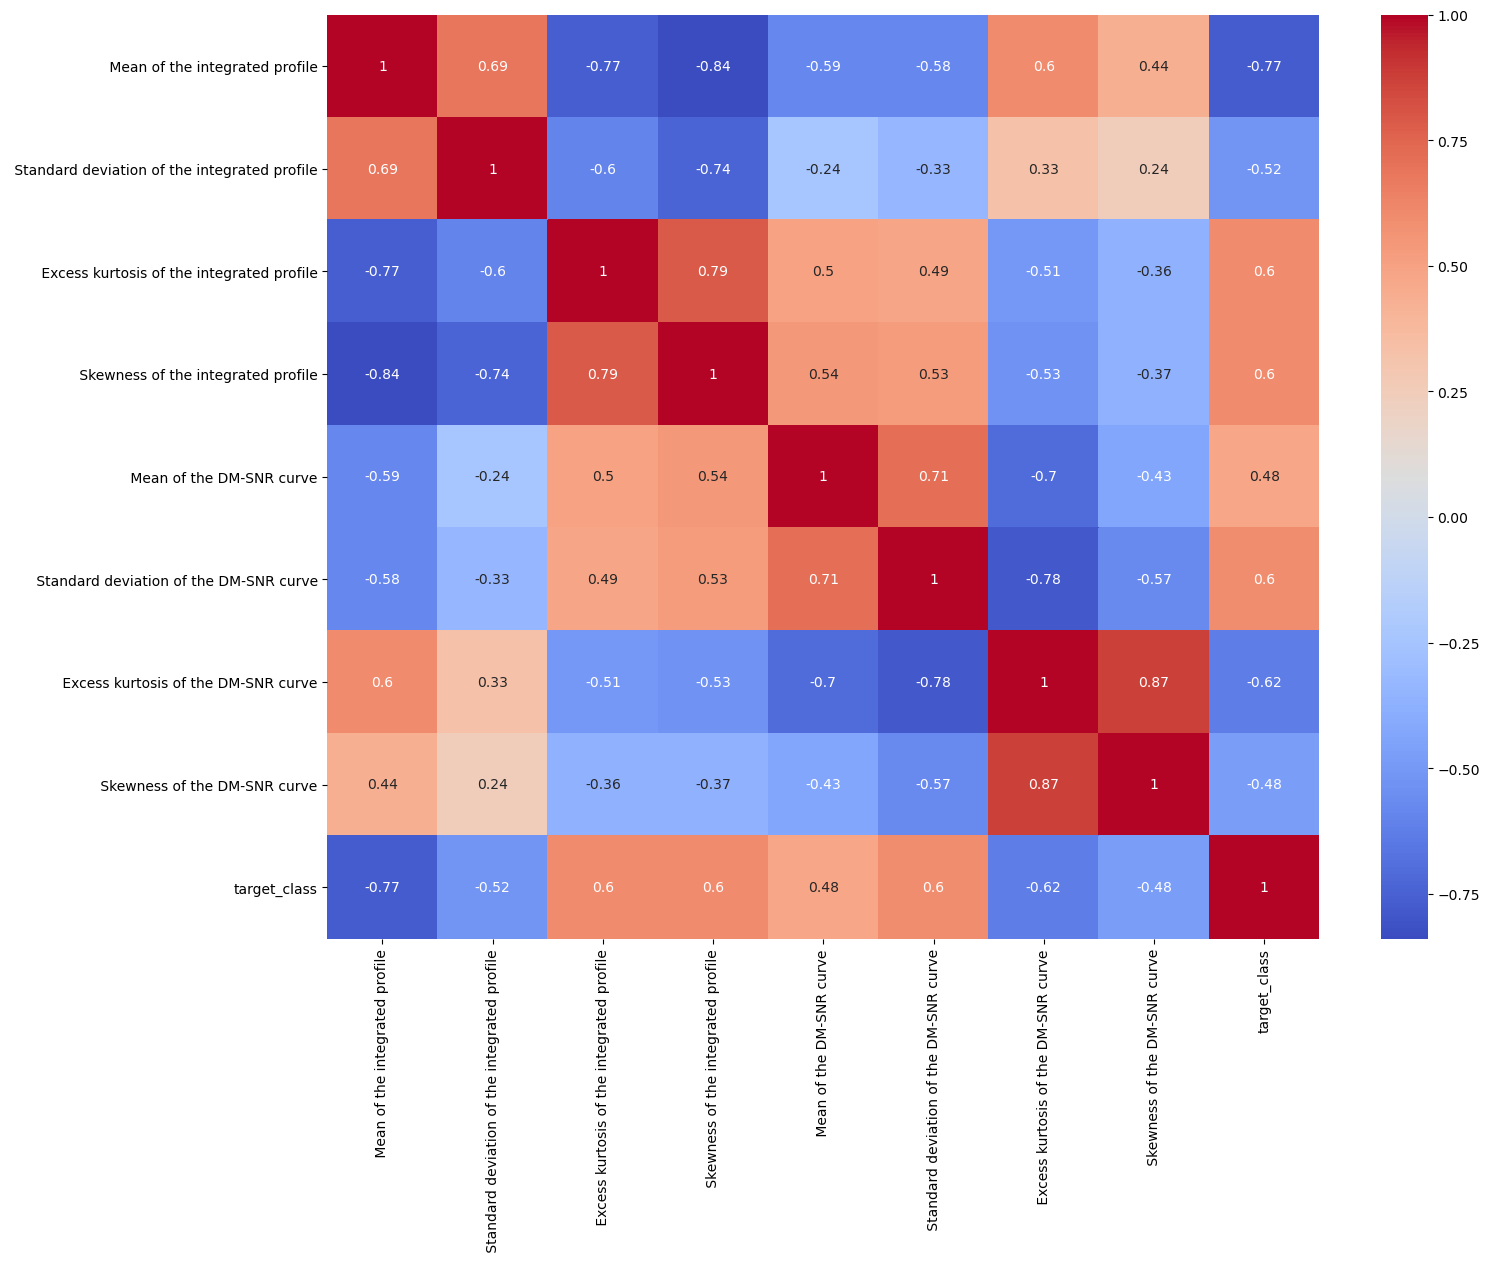

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [18]:
corr_df = pd.DataFrame(corr,index=df.columns)
corr_df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.687720,-0.766437,-0.839248,-0.585761,-0.584705,0.603777,0.438049,-0.774152
Standard deviation of the integrated profile,0.687720,1.000000,-0.597103,-0.737872,-0.239473,-0.334123,0.328842,0.244036,-0.520059
Excess kurtosis of the integrated profile,-0.766437,-0.597103,1.000000,0.789547,0.498520,0.486794,-0.506821,-0.362016,0.604572
Skewness of the integrated profile,-0.839248,-0.737872,0.789547,1.000000,0.544289,0.529556,-0.533169,-0.371069,0.604154
Mean of the DM-SNR curve,-0.585761,-0.239473,0.498520,0.544289,1.000000,0.712956,-0.704612,-0.433852,0.480060
Standard deviation of the DM-SNR curve,-0.584705,-0.334123,0.486794,0.529556,0.712956,1.000000,-0.784527,-0.571456,0.597532
Excess kurtosis of the DM-SNR curve,0.603777,0.328842,-0.506821,-0.533169,-0.704612,-0.784527,1.000000,0.871149,-0.623813
Skewness of the DM-SNR curve,0.438049,0.244036,-0.362016,-0.371069,-0.433852,-0.571456,0.871149,1.000000,-0.479961
target_class,-0.774152,-0.520059,0.604572,0.604154,0.480060,0.597532,-0.623813,-0.479961,1.000000


### EDA

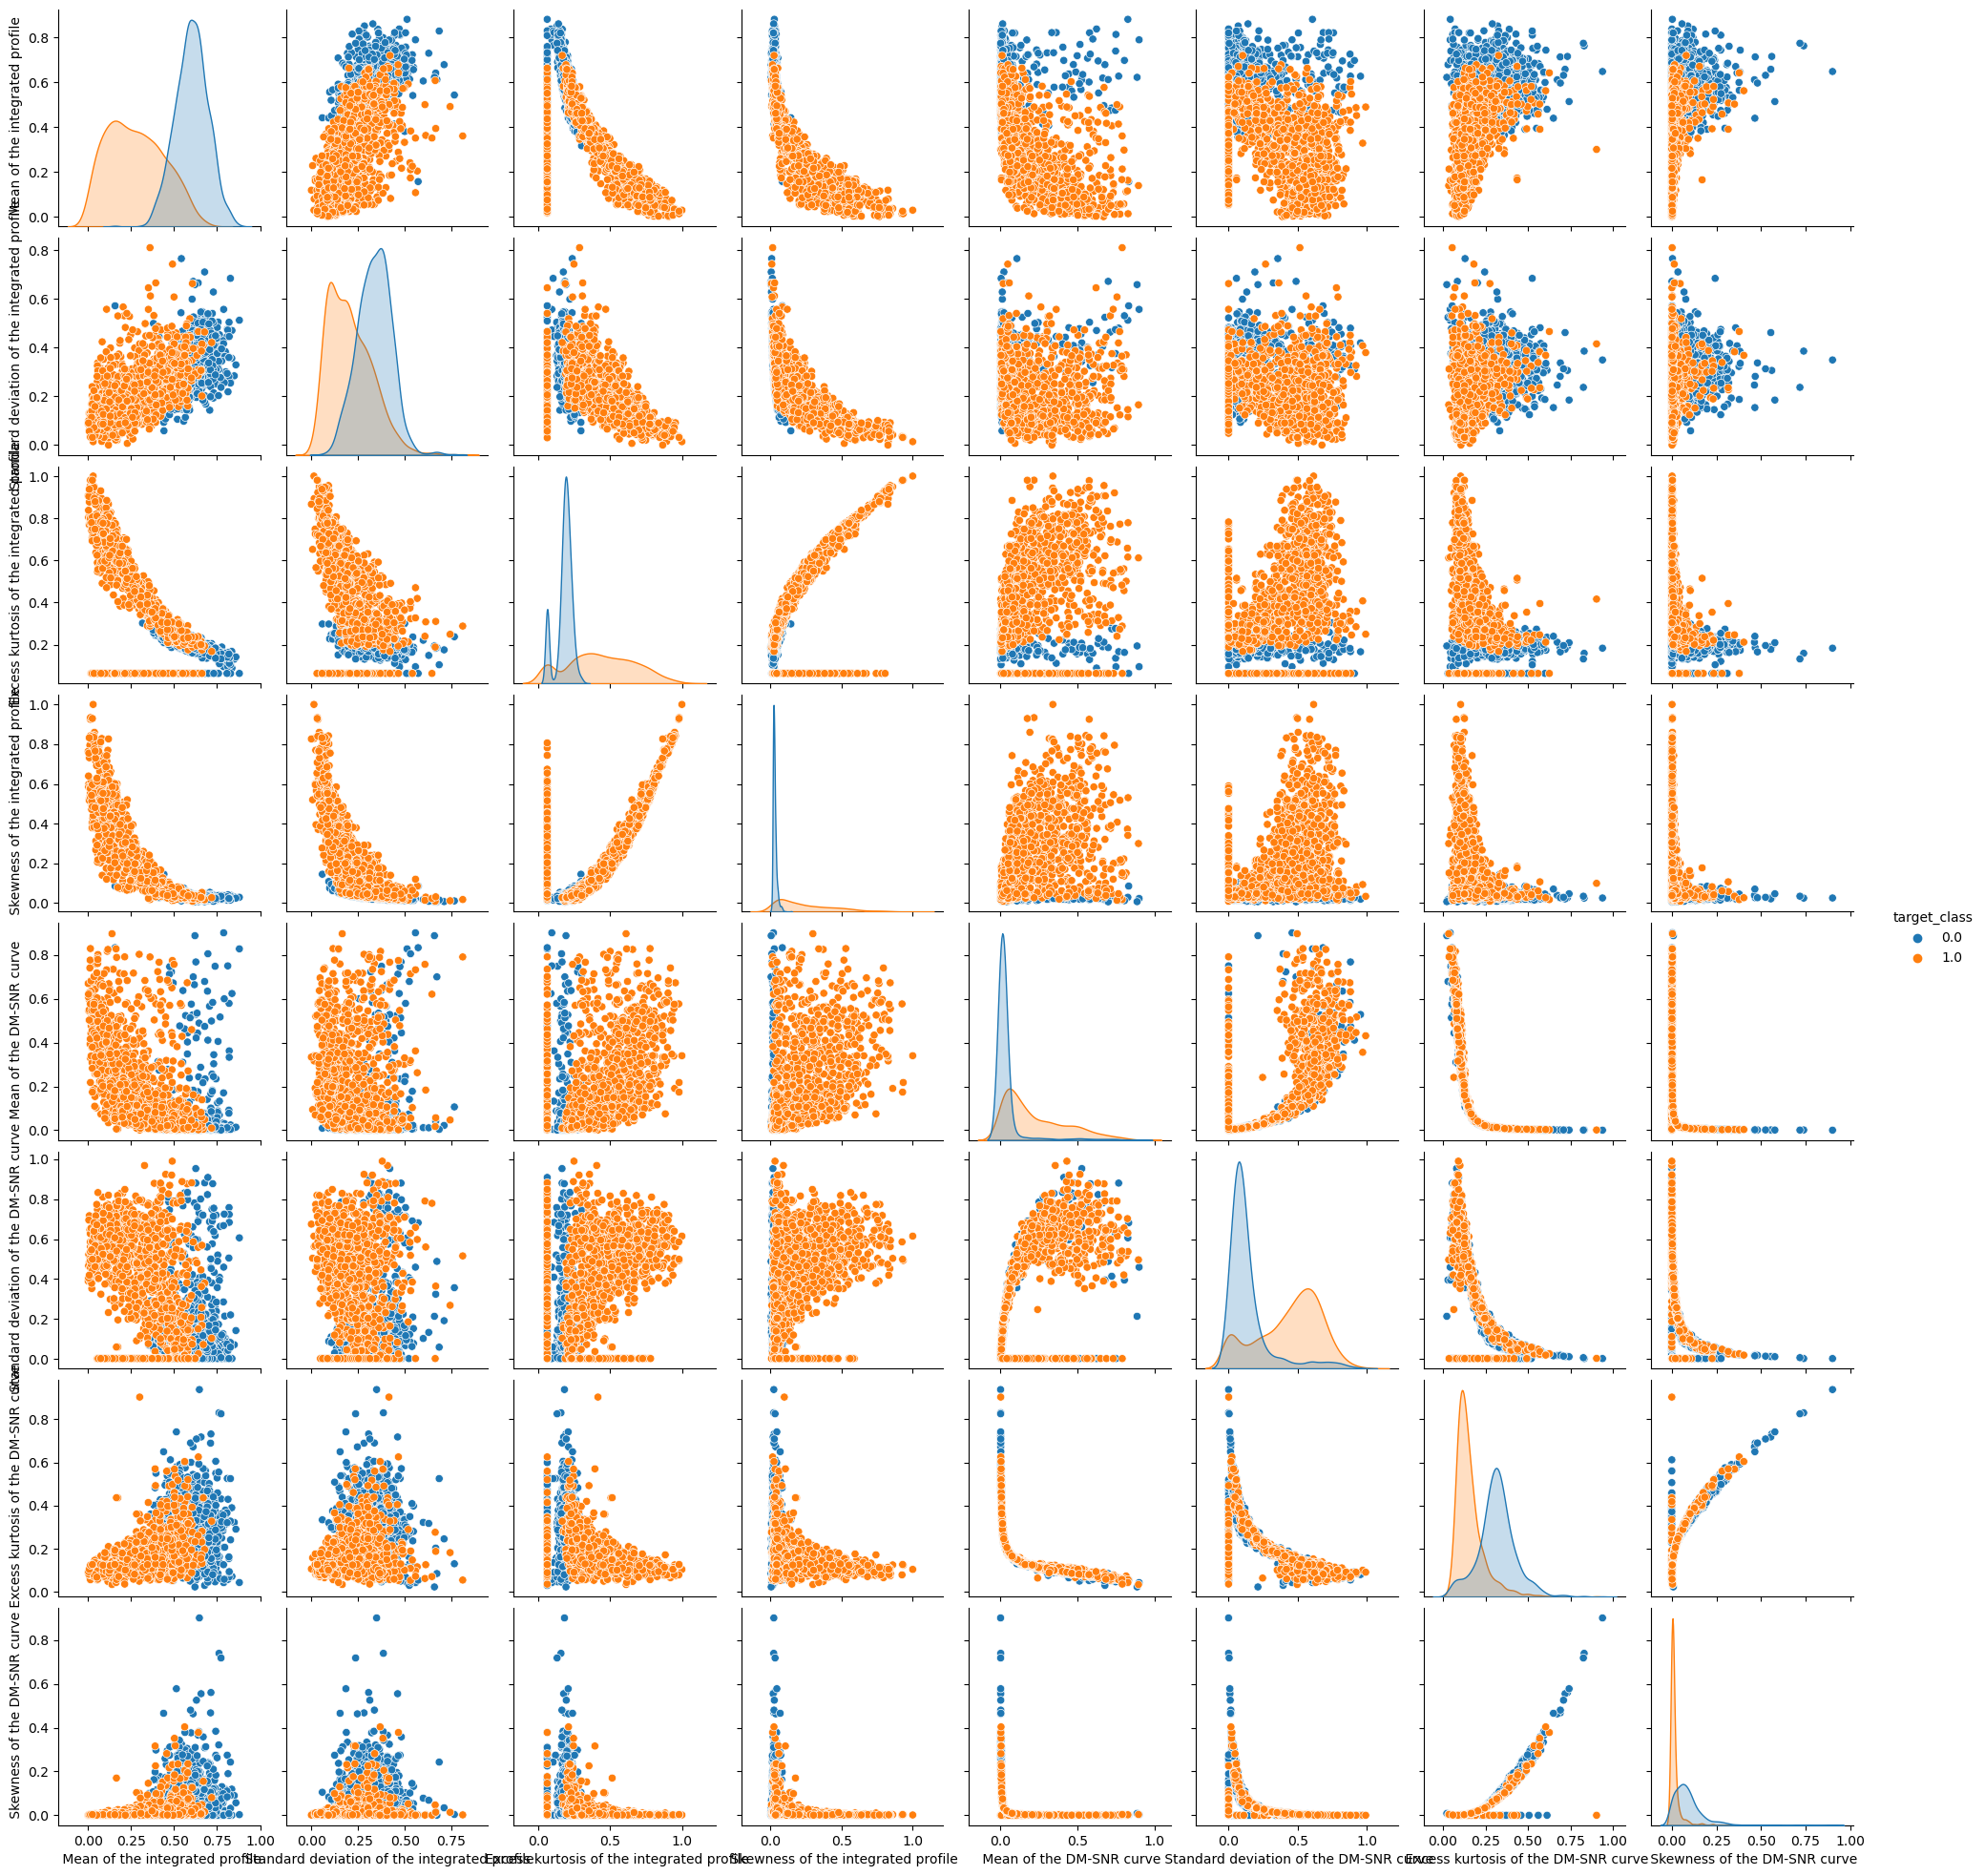

In [19]:
X,y = df.drop(columns='target_class',axis=1),df[['target_class']]
df_with_target = pd.concat([X,y],axis=1)
sns.pairplot(df_with_target, hue='target_class', diag_kind='kde')
plt.show()

##### From these visuals, we can see that there is no highly linear relationship between any independent column

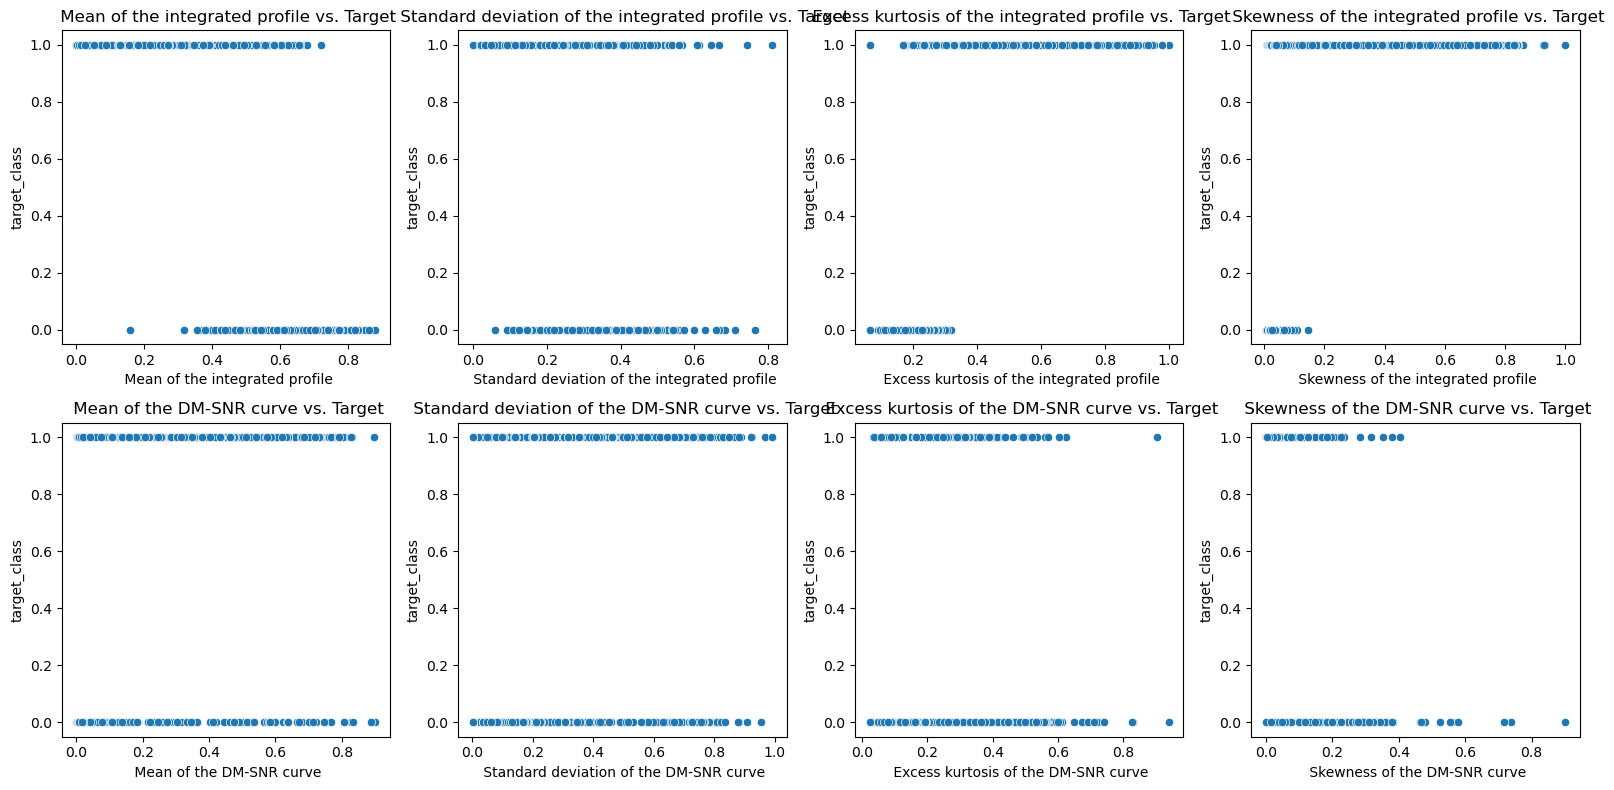

In [20]:
num_features = X.shape[1]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))


axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.scatterplot(x=feature, y='target_class', data=df_with_target, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Target')


plt.tight_layout()
plt.show()

#### It was normal for this visual to be this way, because the values ​​in our target class only consisted of 0 and 1

Model:Logistic regression

In [21]:
X,y = df.drop(columns='target_class',axis=1),df[['target_class']]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       228
         1.0       0.95      0.86      0.91       234

    accuracy                           0.91       462
   macro avg       0.91      0.91      0.91       462
weighted avg       0.91      0.91      0.91       462



In [23]:
confusion_matrix(y_test,y_pred)

array([[218,  10],
       [ 32, 202]], dtype=int64)

In [24]:
X_test.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
5261,0.097443,0.101952,0.736480,0.481718,0.146568,0.489293,0.136927,0.004687
2870,0.740889,0.306042,0.144551,0.029700,0.023235,0.209539,0.244579,0.033369


In [25]:
x=X_test.head(1)

In [26]:
y_pred=y_pred.reshape(-1,1)
y_pred.shape

(462, 1)

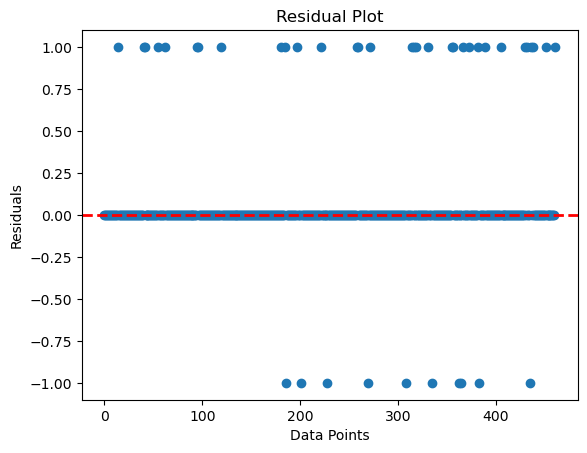

In [27]:

residuals = y_test - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

SVM

In [28]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       228
         1.0       0.96      0.88      0.92       234

    accuracy                           0.92       462
   macro avg       0.92      0.92      0.92       462
weighted avg       0.92      0.92      0.92       462



In [30]:
confusion_matrix(y_test,y_pred)

array([[220,   8],
       [ 29, 205]], dtype=int64)

In [31]:
y_pred=y_pred.reshape(-1,1)
y_pred.shape

(462, 1)

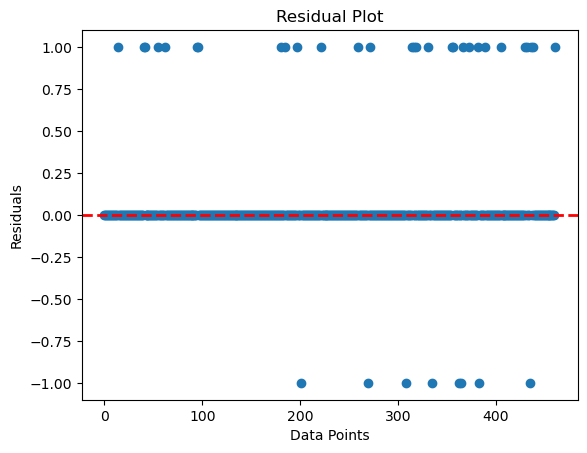

In [32]:
residuals = y_test - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Decision Tree


In [33]:
dec_tree =DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dec_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [34]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy with best model:", accuracy)

Test set accuracy with best model: 0.9285714285714286


#### By  Hyperparameter tuning above, we found the best parameters for the model, and our accuracy should be 0.92857 for those parameters, to check this, we build the model again with the best parameters and check it

In [35]:
dec_tree =DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=4,min_samples_split=2)
dec_tree.fit(X_train,y_train)
y_pred =dec_tree.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       228
         1.0       0.95      0.90      0.93       234

    accuracy                           0.93       462
   macro avg       0.93      0.93      0.93       462
weighted avg       0.93      0.93      0.93       462



In [37]:
confusion_matrix(y_test,y_pred)

array([[218,  10],
       [ 23, 211]], dtype=int64)

Model:Random Forset

In [38]:
df = pd.read_csv('Data/pulsar_data_train.csv')
df.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.15625,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.96875,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0


In [39]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [40]:
df = df.fillna(df.mode().iloc[0])


In [41]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [42]:
X,y = df.drop(columns='target_class',axis =1),df[['target_class']]
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.2,random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred =  rf.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2279
         1.0       0.94      0.81      0.87       227

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [44]:
confusion_matrix(y_test,y_pred)

array([[2268,   11],
       [  43,  184]], dtype=int64)

In [45]:
# We look features importances
rf_import = rf.feature_importances_
rf_import

array([0.17512963, 0.05560177, 0.29108927, 0.25023457, 0.07772804,
       0.04673511, 0.04926151, 0.0542201 ])

In [46]:
a =pd.DataFrame([rf_import], columns =X.columns).T
a.sort_values(by=0)[::-1]

,0
Excess kurtosis of the integrated profile,0.291089
Skewness of the integrated profile,0.250235
Mean of the integrated profile,0.175130
Mean of the DM-SNR curve,0.077728
Standard deviation of the integrated profile,0.055602
Skewness of the DM-SNR curve,0.054220
Excess kurtosis of the DM-SNR curve,0.049262
Standard deviation of the DM-SNR curve,0.046735


#### As a result, we take the first 3 most important points and build the model based on them

In [47]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [48]:
X,y = df[[' Excess kurtosis of the integrated profile',' Skewness of the integrated profile',' Mean of the integrated profile']],df[['target_class']]
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10022, 3), (2506, 3), (10022, 1), (2506, 1))

In [49]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train,y_train)
y_pred =  rf1.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.94      0.79      0.86       227

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [51]:
confusion_matrix(y_test,y_pred)

array([[2267,   12],
       [  47,  180]], dtype=int64)

In [52]:
df.corr()[' Excess kurtosis of the integrated profile']

 Mean of the integrated profile                 -0.634399
 Standard deviation of the integrated profile   -0.384783
 Excess kurtosis of the integrated profile       1.000000
 Skewness of the integrated profile              0.692404
 Mean of the DM-SNR curve                        0.306210
 Standard deviation of the DM-SNR curve          0.297333
 Excess kurtosis of the DM-SNR curve            -0.252308
 Skewness of the DM-SNR curve                   -0.053501
target_class                                     0.582121
Name:  Excess kurtosis of the integrated profile, dtype: float64

In [53]:
rf2 = RandomForestClassifier()


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(rf2, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [54]:
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Test set accuracy with best model:", accuracy)

Test set accuracy with best model: 0.9768555466879489
